In [21]:
import pandas as pd

df = pd.read_csv('strong.csv')


df = df.drop(df.index[-1])

print(df)


            Date     AEX          ATX      BFX    CAC40       DAX
0       1/4/2010  343.03  2537.300049  2563.97  3954.38   6048.30
1       1/5/2010  342.02  2593.459961  2587.77  3977.46   6031.86
2       1/6/2010  341.48  2590.719971  2596.43  4009.67   6034.33
3       1/7/2010  340.55  2588.459961  2590.68  3928.95   6019.36
4       1/8/2010  341.94  2660.330078  2591.64  3862.16   6037.61
...          ...     ...          ...      ...      ...       ...
3059  12/22/2021  783.00  3809.530000  4184.18  7086.58  15593.47
3060  12/23/2021  775.75  3789.270000  4160.17  7140.39  15756.31
3061  12/27/2021  775.46  3745.600000  4145.37  7181.11  15835.25
3062  12/28/2021  781.59  3738.380000  4121.78  7161.52  15963.70
3063  12/29/2021  771.70  3731.430000  4122.01  7173.23  15852.25

[3064 rows x 6 columns]


In [22]:
returns = df.drop(columns='Date').pct_change() 
print(returns)


           AEX       ATX       BFX     CAC40       DAX
0          NaN       NaN       NaN       NaN       NaN
1    -0.002944  0.022134  0.009282  0.005837 -0.002718
2    -0.001579 -0.001056  0.003347  0.008098  0.000409
3    -0.002723 -0.000872 -0.002215 -0.020131 -0.002481
4     0.004082  0.027766  0.000371 -0.016999  0.003032
...        ...       ...       ...       ...       ...
3059 -0.006358 -0.000858 -0.000640 -0.002754  0.009453
3060 -0.009259 -0.005318 -0.005738  0.007593  0.010443
3061 -0.000374 -0.011525 -0.003558  0.005703  0.005010
3062  0.007905 -0.001928 -0.005691 -0.002728  0.008112
3063 -0.012654 -0.001859  0.000056  0.001635 -0.006981

[3064 rows x 5 columns]


In [23]:
import numpy as np

nan_df = df[df.isna().any(axis=1)]
print("NaN values in df:")
print(nan_df)

nan_returns = returns[np.isnan(returns).any(axis=1)]
inf_returns = returns[np.isinf(returns).any(axis=1)]
print("\nNaN values in returns:")
print(nan_returns)
print("\nInfinite values in returns:")
print(inf_returns)


NaN values in df:
Empty DataFrame
Columns: [Date, AEX, ATX, BFX, CAC40, DAX]
Index: []

NaN values in returns:
   AEX  ATX  BFX  CAC40  DAX
0  NaN  NaN  NaN    NaN  NaN

Infinite values in returns:
Empty DataFrame
Columns: [AEX, ATX, BFX, CAC40, DAX]
Index: []


In [24]:
returns_clean = returns.dropna()
print("Cleaned returns DataFrame:")
print(returns_clean)


Cleaned returns DataFrame:
           AEX       ATX       BFX     CAC40       DAX
1    -0.002944  0.022134  0.009282  0.005837 -0.002718
2    -0.001579 -0.001056  0.003347  0.008098  0.000409
3    -0.002723 -0.000872 -0.002215 -0.020131 -0.002481
4     0.004082  0.027766  0.000371 -0.016999  0.003032
5    -0.004153 -0.011149 -0.002230 -0.010714  0.000479
...        ...       ...       ...       ...       ...
3059 -0.006358 -0.000858 -0.000640 -0.002754  0.009453
3060 -0.009259 -0.005318 -0.005738  0.007593  0.010443
3061 -0.000374 -0.011525 -0.003558  0.005703  0.005010
3062  0.007905 -0.001928 -0.005691 -0.002728  0.008112
3063 -0.012654 -0.001859  0.000056  0.001635 -0.006981

[3063 rows x 5 columns]


In [25]:
correlation_matrix = returns_clean.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            AEX       ATX       BFX     CAC40       DAX
AEX    1.000000 -0.028746  0.270871 -0.014002  0.059726
ATX   -0.028746  1.000000 -0.041376 -0.015070 -0.027335
BFX    0.270871 -0.041376  1.000000 -0.014220  0.080838
CAC40 -0.014002 -0.015070 -0.014220  1.000000  0.039367
DAX    0.059726 -0.027335  0.080838  0.039367  1.000000


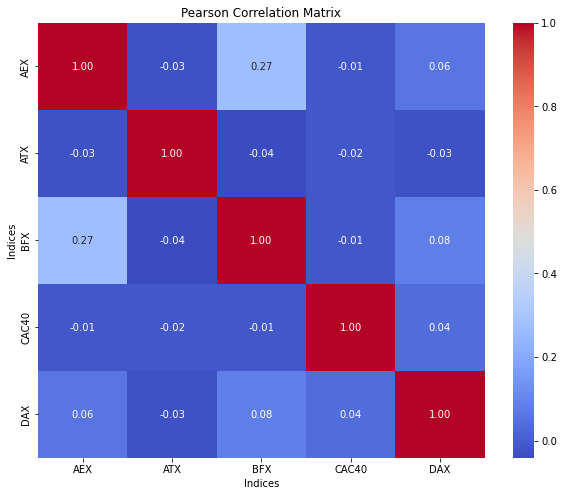

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()


In [26]:
from scipy.stats import pearsonr
p_values = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)
for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            corr, p_value = pearsonr(returns_clean[i], returns_clean[j])
            p_values.loc[i, j] = p_value

print("P-values for Significance Testing:")
print(p_values)


P-values for Significance Testing:
            AEX       ATX       BFX     CAC40       DAX
AEX         NaN  0.111691       0.0  0.438542  0.000943
ATX    0.111691       NaN  0.022024  0.404423  0.130409
BFX         0.0  0.022024       NaN  0.431441  0.000007
CAC40  0.438542  0.404423  0.431441       NaN  0.029355
DAX    0.000943  0.130409  0.000007  0.029355       NaN


In [27]:
significance = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)
alpha = 0.01

for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            corr, p_value = pearsonr(returns_clean[i], returns_clean[j])
            if p_value < alpha:
                significance.loc[i, j] = 'Significant'
            else:
                significance.loc[i, j] = 'Not Significant'

print("Significance Interpretation:")
print(significance)


Significance Interpretation:
                   AEX              ATX              BFX            CAC40  \
AEX                NaN  Not Significant      Significant  Not Significant   
ATX    Not Significant              NaN  Not Significant  Not Significant   
BFX        Significant  Not Significant              NaN  Not Significant   
CAC40  Not Significant  Not Significant  Not Significant              NaN   
DAX        Significant  Not Significant      Significant  Not Significant   

                   DAX  
AEX        Significant  
ATX    Not Significant  
BFX        Significant  
CAC40  Not Significant  
DAX                NaN  


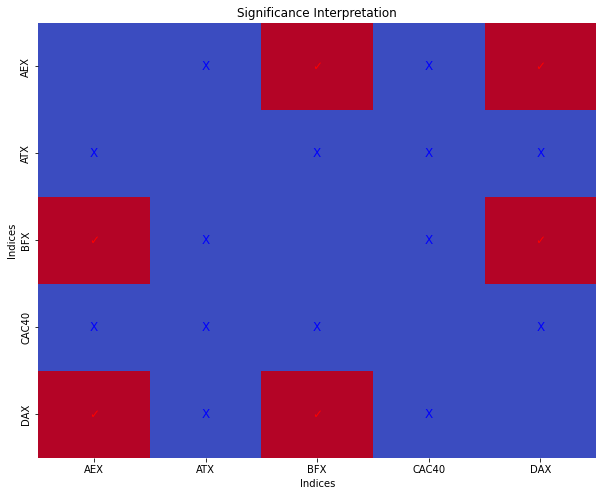

In [31]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(significance=='Significant', cmap='coolwarm', cbar=False)


for i in range(len(significance.columns)):
    for j in range(len(significance.columns)):
        if significance.iloc[i, j] == 'Significant':
            heatmap.text(j+0.5, i+0.5, '✓', ha='center', va='center', color='red', fontsize=12)
        elif significance.iloc[i, j] == 'Not Significant':
            heatmap.text(j+0.5, i+0.5, 'X', ha='center', va='center', color='blue', fontsize=12)

plt.title("Significance Interpretation")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()


In [32]:

spearman_correlation_matrix = returns_clean.corr(method='spearman')


print("Spearman Correlation Matrix:")
print(spearman_correlation_matrix)


Spearman Correlation Matrix:
            AEX       ATX       BFX     CAC40       DAX
AEX    1.000000  0.013626  0.182603 -0.022826  0.069478
ATX    0.013626  1.000000  0.006260 -0.011923 -0.011899
BFX    0.182603  0.006260  1.000000 -0.020479  0.076465
CAC40 -0.022826 -0.011923 -0.020479  1.000000  0.056415
DAX    0.069478 -0.011899  0.076465  0.056415  1.000000


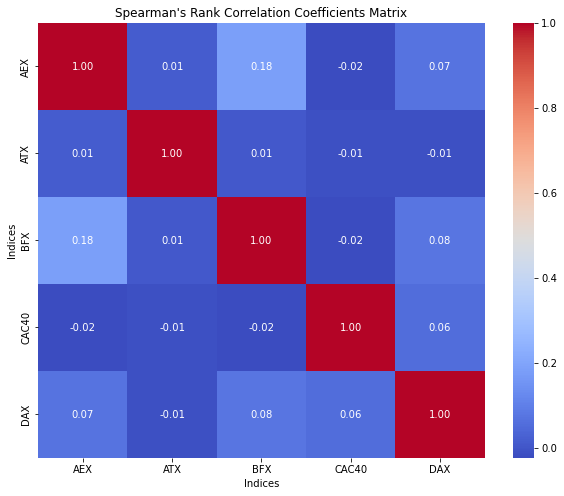

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Rank Correlation Coefficients Matrix")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()


In [35]:
from scipy.stats import spearmanr

spearman_p_values = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)


for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            spearman_corr, spearman_p_value = spearmanr(returns_clean[i], returns_clean[j])
            spearman_p_values.loc[i, j] = spearman_p_value

print("Spearman P-values for Significance Testing:")
print(spearman_p_values)


Spearman P-values for Significance Testing:
            AEX       ATX       BFX     CAC40       DAX
AEX         NaN  0.450949       0.0  0.206611  0.000119
ATX    0.450949       NaN  0.729093  0.509491   0.51034
BFX         0.0  0.729093       NaN  0.257181  0.000023
CAC40  0.206611  0.509491  0.257181       NaN  0.001787
DAX    0.000119   0.51034  0.000023  0.001787       NaN


In [36]:
spearman_significance = pd.DataFrame(index=returns_clean.columns, columns=returns_clean.columns)
alpha = 0.01


for i in returns_clean.columns:
    for j in returns_clean.columns:
        if i != j:
            spearman_corr, spearman_p_value = spearmanr(returns_clean[i], returns_clean[j])
            if spearman_p_value < alpha:
                spearman_significance.loc[i, j] = 'Significant'
            else:
                spearman_significance.loc[i, j] = 'Not Significant'


print("Spearman Significance Interpretation:")
print(spearman_significance)


Spearman Significance Interpretation:
                   AEX              ATX              BFX            CAC40  \
AEX                NaN  Not Significant      Significant  Not Significant   
ATX    Not Significant              NaN  Not Significant  Not Significant   
BFX        Significant  Not Significant              NaN  Not Significant   
CAC40  Not Significant  Not Significant  Not Significant              NaN   
DAX        Significant  Not Significant      Significant      Significant   

                   DAX  
AEX        Significant  
ATX    Not Significant  
BFX        Significant  
CAC40      Significant  
DAX                NaN  


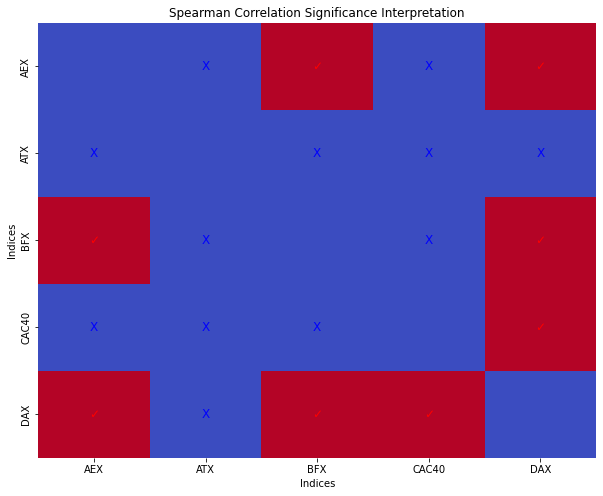

In [37]:
plt.figure(figsize=(10, 8))
spearman_heatmap = sns.heatmap(spearman_significance=='Significant', cmap='coolwarm', cbar=False)


for i in range(len(spearman_significance.columns)):
    for j in range(len(spearman_significance.columns)):
        if spearman_significance.iloc[i, j] == 'Significant':
            spearman_heatmap.text(j+0.5, i+0.5, '✓', ha='center', va='center', color='red', fontsize=12)
        elif spearman_significance.iloc[i, j] == 'Not Significant':
            spearman_heatmap.text(j+0.5, i+0.5, 'X', ha='center', va='center', color='blue', fontsize=12)

plt.title("Spearman Correlation Significance Interpretation")
plt.xlabel("Indices")
plt.ylabel("Indices")
plt.show()
